In [1]:
import numpy as np
import pandas as pd
import operator
from IPython.display import display, HTML
import math
from collections import defaultdict
import matplotlib.pyplot as plt



In [2]:

#Task 1
#1.1 Compute the total number of wins for each of the teams in MLB over 2011-2015, sort them in a descending order.
print("1.1 Compute the total number of wins for each of the teams in MLB over 2011-2015, sort them in a descending order.")
mlbTeams = pd.read_csv('teams.csv')

# mlbTeams.set_index('yearID')
pd.options.display.max_columns = None
pd.options.display.max_rows = None

# display(mlbTeams.loc[:,'teamID'])
def getTeamsByYear(mT, year):
    mlbTeamsByYear = mT.loc[mT['yearID'] == year]
    return mlbTeamsByYear

def getVarList(df, var):
    return df[var].unique()

# teamList = getVarList(mlbTeams, 'teamID')

Teams15 = {}
mlbT = []
mlbTeamWins = {}
for year in range(2011, 2016):
    Teams15[year] = (getTeamsByYear(mlbTeams, year))


mlbTeamWins = defaultdict(lambda:0,mlbTeamWins)

for year in range(2011,2016):
    for team in getVarList(Teams15[year], 'teamID'):
        temp = Teams15[year].loc[Teams15[year]['teamID'] == team]
        mlbTeamWins[team] = mlbTeamWins[team] + (int)(temp['W'])

      
sortedMlb = sorted(mlbTeamWins.items(), key=lambda x: x[1], reverse=True)
for i in range(0,len(sortedMlb)):
    print(sortedMlb[i][0] + ' ' + str(sortedMlb[i][1]))


1.1 Compute the total number of wins for each of the teams in MLB over 2011-2015, sort them in a descending order.
SLN 465
NYA 448
LAN 446
WAS 443
DET 440
LAA 436
TEX 435
PIT 431
TBA 430
SFN 428
ATL 425
BAL 424
OAK 420
KCA 413
CIN 406
CLE 406
BOS 405
TOR 404
MIL 403
ARI 399
NYN 394
PHI 392
CHA 376
SEA 376
SDN 374
CHN 368
MIN 348
COL 345
HOU 318
MIA 279
FLO 72


In [76]:
#Task 2
# 1.2)  Compute the average payroll per year for all teams over 2011-2015, sort them in a descending order 
print("1.2)  Compute the average payroll per year for all teams over 2011-2015, sort them in a descending order ")

mlbPlayers = pd.read_csv('players.csv')

mlbPlayersByYear = mlbPlayers.loc[mlbPlayers['yearID'].between(2011,2016)]
# print(mlbPlayersByYear)


teamNames = getVarList(mlbPlayersByYear, 'teamID')
teamPlayers = {elem: pd.DataFrame for elem in teamNames}
for key in teamPlayers.keys():
    teamPlayers[key] = mlbPlayersByYear[mlbPlayersByYear.teamID == key]

teamSalary = {}
teamSalary = {elem: pd.DataFrame for elem in teamNames}
for team in teamPlayers.keys():
    teamSalary[team] = teamPlayers[team]['salary'].sum()
    
    
sortedMlbSalary = sorted(teamSalary.items(), key=lambda x: x[1], reverse=True)
print('Team   Salary (USD)')
for i in range(0,len(sortedMlbSalary)):
   
    print(sortedMlbSalary[i][0] + '    ' + str(sortedMlbSalary[i][1]))


1.2)  Compute the average payroll per year for all teams over 2011-2015, sort them in a descending order 
Team   Salary (USD)
NYA    1023587567.0
LAN    852006370.0
PHI    806688473.0
BOS    772509992.0
SFN    697731017.0
DET    694729981.0
LAA    652846247.0
TEX    575815686.0
WAS    545091493.0
CHA    538977977.0
SLN    526132141.0
CHN    494224648.0
TOR    484752600.0
CIN    477067307.0
MIN    467177000.0
BAL    464812203.0
MIL    460965310.0
SEA    450450043.0
ATL    425314409.0
NYN    422328604.0
COL    404538813.0
ARI    376762166.0
CLE    360305831.0
SDN    359997440.0
KCA    353169050.0
PIT    350264498.0
OAK    328380901.0
TBA    293211976.0
HOU    254017800.0
MIA    251593300.0
FLO    56944000.0


In [77]:
df = pd.DataFrame(columns=['team', 'salary', 'wins'])
pd.set_option('display.float_format', lambda x: '%.3f' % x)


so = pd.DataFrame(sortedMlb)
for i in range(0,len(sortedMlbSalary)):
    arow = []
    t = sortedMlbSalary[i][0]
    s = sortedMlbSalary[i][1] 
    arow.append(t)
    arow.append(s)
    z = so.loc[so[0] == t][1]
    arow.append(int(z))
    df.loc[len(df)] = arow
    
    


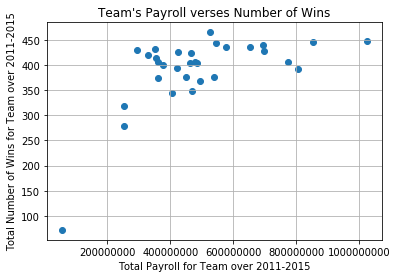

I would not say that the data shows that a team's payroll is strongly correlated to their winning record.
Most of the teams have an average of greater than 400 wins while the payroll numbers for those teams range from 400 million to 1 billion dollars.


In [78]:
#Task 3
# 1.3)  Create a visualization of your choice which will all allow you to show whether a team’s winning record is 
# related to its payroll. So is a team’s winning record related to its payroll? 

plt.scatter(df['salary'], df['wins'])
plt.xlabel('Total Payroll for Team over 2011-2015')
plt.ylabel('Total Number of Wins for Team over 2011-2015')
ax = plt.gca()
ax.grid()
ax.get_xaxis().get_major_formatter().set_scientific(False)
plt.title("Team's Payroll verses Number of Wins")

plt.show()


print('I would not say that the data shows that a team\'s payroll is strongly correlated to their winning record.')
print('Most of the teams have an average of greater than 400 wins while the payroll numbers for those teams range from 400 million to 1 billion dollars.')

In [79]:

Teams15 = {}
mlbT = []
mlbTeamWins = {}
mlbTeamLs = {}

for year in range(2011, 2016):
    Teams15[year] = (getTeamsByYear(mlbTeams, year))


mlbTeamWins = defaultdict(lambda:0,mlbTeamWins)
mlbTeamLs = defaultdict(lambda:0,mlbTeamLs)

for year in range(2011,2016):
    wins = 0
    for team in getVarList(Teams15[year], 'teamID'):
        temp = Teams15[year].loc[Teams15[year]['teamID'] == team]
        wins = wins + (int)(temp['W'])
        mlbTeamWins[team] = mlbTeamWins[team] + (int)(temp['W'])
        mlbTeamLs[team] = mlbTeamLs[team] + (int)(temp['L'])

In [83]:
# 2.1)  Compute the Batting Averages  for each of the MLB teams over 2011-2015, sort them in a descending order. 
# The Batting Average is defined as Hits/At Bats. The average is calculated from all players in each team.
print('Batting Average for each team, cumulatively over the years 2011-2015')
habwl = pd.DataFrame(columns=['teamID', 'hits/at bats', 'win/loss'])

mlbPlayersByYear = mlbPlayers.loc[mlbPlayers['yearID'].between(2011,2016)]



teamNames = getVarList(mlbPlayersByYear, 'teamID')
teamPlayers = {elem: pd.DataFrame for elem in teamNames}
for key in teamPlayers.keys():
    teamPlayers[key] = mlbPlayersByYear[mlbPlayersByYear.teamID == key]

teamHitsAtBats = {}
teamHitsAtBats = {elem: pd.DataFrame for elem in teamNames}
for team in teamPlayers.keys():
    arow = []
    h = teamPlayers[team]['H'].sum()
    b = teamPlayers[team]['AB'].sum()
    w = mlbTeamWins[team]
    l = mlbTeamLs[team]

    wl = w/l
    hab = h/b
    arow.append(team)
    arow.append(hab)
    arow.append(wl)
    
    habwl.loc[len(habwl)] = arow
    teamHitsAtBats[team] =  hab

sortedHAB = sorted(teamHitsAtBats.items(), key=lambda x: x[1], reverse=True)
for i in range(0,len(sortedHAB)):
    print(sortedHAB[i][0] +  ' ' + str(sortedHAB[i][1]))


Batting Average for each team, cumulatively over the years 2011-2015
DET 0.275054446784962
COL 0.2686353211009174
TEX 0.26646286639093686
KCA 0.2662186796296958
BOS 0.26548515414121326
SLN 0.26392961876832843
LAA 0.2592579224716668
SFN 0.2586692674469007
LAN 0.2575247162211644
ARI 0.25626801152737755
MIL 0.2548869438366156
TOR 0.2548026482399334
BAL 0.25400416576887164
NYA 0.2533478497550354
CLE 0.2530440155562825
WAS 0.2519117325759231
CHA 0.251708304710944
PIT 0.250382012660991
MIN 0.250009042572431
PHI 0.24928728663707553
CIN 0.24856645133193003
TBA 0.2477623935995324
MIA 0.24685886599351214
NYN 0.2466314111851637
FLO 0.24655047204066813
OAK 0.2462289744981009
ATL 0.2462062898614471
HOU 0.24499415375621164
CHN 0.24339876898422988
SDN 0.23960600582875272
SEA 0.23930534823606509


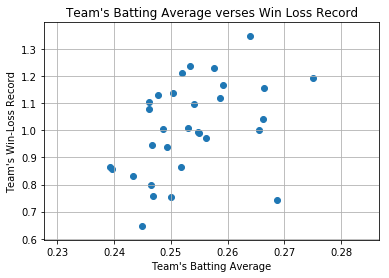

I would say that the team's winning record is related to its batting average. There seems to be a positive 
correlation between higher batting average and higher win-loss record.


In [85]:
# 2.2) Create a visualization of your choice which will allow you to decide whether a team’s batting average 
# is related to its win-loss record. So is a team’s winning record related to its batting average? 

plt.scatter(habwl['hits/at bats'], habwl['win/loss'])
plt.xlabel('Team\'s Batting Average')
plt.ylabel('Team\'s Win-Loss Record')
ax = plt.gca()
ax.grid()
ax.get_xaxis().get_major_formatter().set_scientific(False)
plt.title("Team's Batting Average verses Win Loss Record")

plt.show()


print('I would say that the team\'s winning record is related to its batting average. There seems to be a positive \ncorrelation between higher batting average and higher win-loss record.')

In [86]:
# 3.1) Display the average ERA (Earned Run Average) for each of the MLB teams in 2011-2015, 
# sort them in a descending order. A lower ERA indicates a better pitching performance. 

mlb = pd.DataFrame.from_csv('pitching.csv')

def getPitchersByYear(year):
    pitchers = mlb.loc[mlb['yearID'] == year]
    pitchers = pitchers.dropna(subset = ['ERA'])
    return pitchers

def calculateAvgOfColumnForTeams(teamPitchers,Var): #takes into account how many pitchers
    teamAvg = {}
    for team in teamPitchers.keys():
        teamAvg[team] = (sum(teamPitchers[team][Var]) / len(teamPitchers[team]))
    return teamAvg

def getTeamPitchers(pitchers):
    teamNames = getVarList(pitchers, 'teamID')
    teamPitchers = {elem: pd.DataFrame for elem in teamNames}
    for key in teamPitchers.keys():
        teamPitchers[key] = pitchers[pitchers.teamID == key]
    return teamPitchers


pitchers1115 = {}
for x in range(2011, 2016):
    pitchers1115[x] = getPitchersByYear(x)


# for p in game.players.passing():
#     d.append({'Player': p, 'Team': p.team, 'Passer Rating':
#         p.passer_rating()})

# pd.DataFrame(d)
# ERA = 9 × Earned Runs Allowed / Innings Pitched


teamAvg = {}
f = []
teamlist = getVarList(pitchers1115[2011], "teamID")
for year in pitchers1115.keys():
    teamAvg = calculateAvgOfColumnForTeams(getTeamPitchers(pitchers1115[year]), 'ERA')
    f.append(teamAvg)
    
# print(f)    
avgERATab=[['teamID','ERA']]

for team in teamlist:
    r = []
    r.append(team)
    x = np.float64(0)
    for i in range(0,5):
        y = f[i].get(team)
        if y is not None:
            x = x + y
        
    
    if team != 'FLO':
        x = x / 5

    r.append(x)
    
    avgERATab.append(r)
print('Average ERA for each team in years 2011 to 2015 cumulative')
df = pd.DataFrame(avgERATab, index=None)
df.columns = df.iloc[0]
df.drop(df.index[0], inplace=True)
df = df.sort_values(by=['ERA'],  ascending=False)
pd.options.display.float_format = '{:,.3f}'.format
# df.set_index('teamID', inplace=True)
print(df.to_string(index=False))


Average ERA for each team in years 2011 to 2015 cumulative
teamID   ERA
  TOR 6.181
  LAA 5.914
  NYA 5.849
  NYN 5.800
  COL 5.771
  DET 5.490
  CHN 5.310
  HOU 5.276
  ARI 5.140
  PHI 5.056
  KCA 5.023
  BAL 5.022
  BOS 4.987
  CIN 4.864
  CHA 4.740
  FLO 4.737
  SLN 4.714
  MIN 4.700
  LAN 4.683
  TEX 4.681
  SEA 4.609
  CLE 4.527
  MIL 4.379
  OAK 4.357
  TBA 4.238
  SFN 4.224
  SDN 4.190
  WAS 4.114
  PIT 4.113
  ATL 4.015


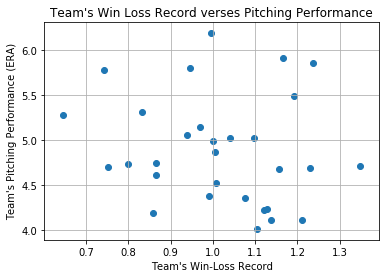

A lower ERA indicates a better pitching performance. I would say that there is a slight correlation between a lower ERA and a higher Win/Loss Record. There is a concentration of teams that have a winning record (Win/Loss > 1.0) and a good pitching performance (ERA < 5.0)


In [87]:
# 3.2) Create a visualization of your choice which will allow you to decide if a team’s win-loss record is 
# related to its pitching performance. So is a team’s winning record related to its pitching performance? 


pitchingwl = pd.merge(df, habwl,how='right', on=['teamID'])
pitchingwl = pitchingwl.drop(['hits/at bats'], axis=1)
pitchingwl


plt.scatter( pitchingwl['win/loss'],pitchingwl['ERA'])
plt.xlabel('Team\'s Win-Loss Record')
plt.ylabel('Team\'s Pitching Performance (ERA)')
ax = plt.gca()
ax.grid()
ax.get_xaxis().get_major_formatter().set_scientific(False)
plt.title("Team's Win Loss Record verses Pitching Performance")

plt.show()

print('A lower ERA indicates a better pitching performance. I would say that there is a slight correlation between a lower ERA and a higher Win/Loss Record. There is a concentration of teams that have a winning record (Win/Loss > 1.0) and a good pitching performance (ERA < 5.0)')
